# Google Stock Prise Predection
Using Recurrent Neural Network
We are predecting google stock prise


Data set link - https://www.kaggle.com/rahulsah06/gooogle-stock-price

From here we can see our data has 6 columns:

* Date: The date of recorded data
* Open: The price when stock market open
* High: The highest price price of date
* Low: The lowest price point of date
* Volumn: Total Sale of stock on that date

From this point we going to define our goal is to predict the close price of the given date from test data



# Part 1 - Data Preprocessing

In [0]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values


In [0]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [0]:
# Creating a data structure with 60 timesteps and 1 output
# We use 60 because  60 days back and forward to predect ,and 1258 the no of train set range no
# 0 is the coulmn index
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
# Reshaping
# we have to reshape the data into 3D
# 1s is no of lines in X_train ,2nd is no of times step(coulmn od xtrain),3rd is no of predector the open stock prise
# for mode details go to keras recurent layer docomentation
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Part 2 - Building the RNN

In [5]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [6]:
# Initialising the RNN
regressor = Sequential()

In [7]:
# Adding the first LSTM layer and some Dropout regularisation
# We use return_sequence true because we are addind anather layer after it, at the last layer it will be False

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


In [0]:
# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [0]:
# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [0]:
# Adding the output layer
# For Full connection layer we use dense
# As the output is 1D so we use unit=1
regressor.add(Dense(units = 1))

In [12]:
# Compiling the RNN
# For optimizer we can go through keras optimizers Docomentation
# As it is regression problem so we use mean squared error
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [22]:
# Fitting the RNN to the Training set
# For best fit accourding to data we can increase the epochs
# For forward & back propageted and update weights we use 32  stock prises to train 
regressor.fit(X_train, y_train, epochs = 150, batch_size = 20)

Epoch 1/150
1198/1198 [==============================] - 10s 9ms/step - loss: 9.2234e-04
Epoch 2/150
1198/1198 [==============================] - 10s 9ms/step - loss: 8.8963e-04
Epoch 3/150
1198/1198 [==============================] - 11s 9ms/step - loss: 9.4228e-04
Epoch 4/150
1198/1198 [==============================] - 11s 9ms/step - loss: 8.5423e-04
Epoch 5/150
1198/1198 [==============================] - 11s 9ms/step - loss: 9.5533e-04
Epoch 6/150
1198/1198 [==============================] - 11s 9ms/step - loss: 8.2004e-04
Epoch 7/150
1198/1198 [==============================] - 11s 9ms/step - loss: 8.4671e-04
Epoch 8/150
1198/1198 [==============================] - 11s 9ms/step - loss: 0.0011
Epoch 9/150
1198/1198 [==============================] - 11s 9ms/step - loss: 8.9429e-04
Epoch 10/150
1198/1198 [==============================] - 11s 9ms/step - loss: 9.8178e-04
Epoch 11/150
1198/1198 [==============================] - 11s 9ms/step - loss: 9.6253e-04
Epoch 12/150
1198/1198 

# Part 3 - Making the predictions and visualising the results

In [0]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values


In [0]:
# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


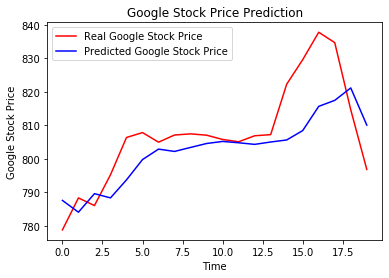

In [25]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()